# Trabalho Final - Construção e Analise de Algoritmos

## Setup

In [1]:
import pandas as pd
import json
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Questão 1

## Questão 2

## Questão 3

## Questão 4

![image info](https://miro.medium.com/v2/resize:fit:640/format:webp/1*oAS8FAUt3XK16kTtLp18Nw.png)

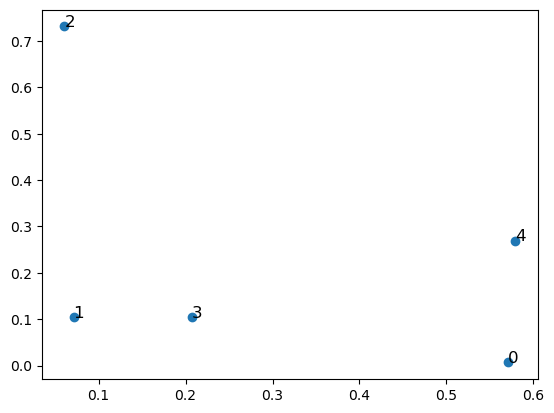

(array([0.57106375, 0.00669842]), array([0.20744136, 0.10432996]), array([0.07113733, 0.10384418]), array([0.06062379, 0.73114136]), array([0.57923332, 0.26914014]))


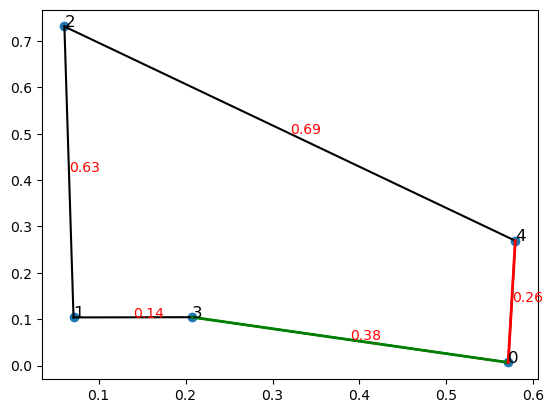

[array([0.57923332, 0.26914014]), array([0.20744136, 0.10432996]), array([0.07113733, 0.10384418]), array([0.06062379, 0.73114136]), array([0.57106375, 0.00669842])]


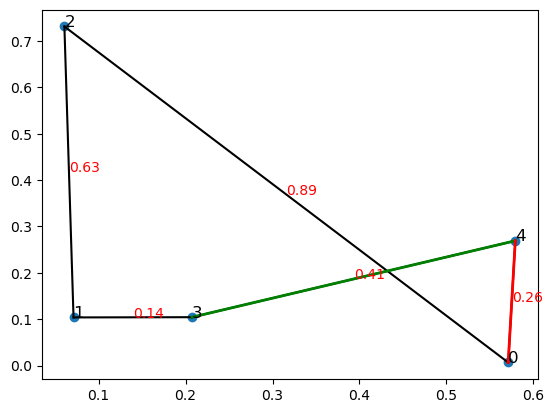

In [55]:
def plot_cidades(cidades):
    plt.scatter(cidades[:, 0], cidades[:, 1])
    for i in range(len(cidades)):
        plt.text(cidades[i][0], cidades[i][1], f"{i}", fontsize=12)

def plot_rota(rota):
    for i in range(len(rota) - 1):
        plt.plot([rota[i][0], rota[i+1][0]], [rota[i][1], rota[i+1][1]], 'k-')
        distancia = calcular_distancia(rota[i], rota[i+1])
        plt.text((rota[i][0] + rota[i+1][0])/2, (rota[i][1] + rota[i+1][1])/2, f"{distancia:.2f}", color='red')
    plt.plot([rota[-1][0], rota[0][0]], [rota[-1][1], rota[0][1]], 'k-')

    distancia = calcular_distancia(rota[-1], rota[0])
    plt.text((rota[-1][0] + rota[0][0])/2, (rota[-1][1] + rota[0][1])/2, f"{distancia:.2f}", color='red')
    plt.plot([rota[0][0], rota[1][0]], [rota[0][1], rota[1][1]], 'g-', linewidth=2)
    plt.plot([rota[-1][0], rota[0][0]], [rota[-1][1], rota[0][1]], 'r-', linewidth=2)

def calcular_distancia(cidade1, cidade2):
    return np.linalg.norm(cidade2 - cidade1)

def calcular_distancia_total(rota):
    distancia_total = 0
    for i in range(len(rota) - 1):
        distancia_total += calcular_distancia(rota[i], rota[i + 1])
    
    distancia_total += calcular_distancia(rota[-1], rota[0])
    return distancia_total

def caixeiro_1(cidades):
    permutacoes = itertools.permutations(cidades)
    menor_distancia = float('inf')
    melhor_rota = None

    for permutacao in permutacoes:
        distancia_atual = calcular_distancia_total(np.array(permutacao))
        if distancia_atual < menor_distancia:
            menor_distancia = distancia_atual
            melhor_rota = permutacao

    return melhor_rota

def caixeiro_2(cidades):
    numero_de_cidades = len(cidades)
    visitadas = [False] * numero_de_cidades
    rota = []
    
    cidade_atual = 0
    visitadas[cidade_atual] = True
    
    for _ in range(numero_de_cidades - 1):
        distancia_minima = float('inf')
        cidade_proxima = None
        
        for i in range(numero_de_cidades):
            if not visitadas[i]:
                distancia = calcular_distancia(cidades[cidade_atual], cidades[i])
                if distancia < distancia_minima:
                    distancia_minima = distancia
                    cidade_proxima = i
        
        cidade_atual = cidade_proxima
        visitadas[cidade_atual] = True
        rota.append(cidades[cidade_atual])
    
    rota.append(cidades[0])
    
    return rota

cidades = np.random.rand(5, 2)

plot_cidades(cidades)
plt.show()

# Caixeiro viajante com força bruta
melhor_rota = caixeiro_1(cidades)
print(melhor_rota)

plot_cidades(cidades)
plot_rota(melhor_rota)
plt.show()

# Caixeiro viajante com algoritmo guloso
melhor_rota = caixeiro_2(cidades)
print(melhor_rota)

plot_cidades(cidades)
plot_rota(melhor_rota)
plt.show()

## Questão 5

In [6]:
credits = pd.read_csv('./data/tmdb_5000_credits.csv')

actor_movies = {}

for index, row in credits.iterrows():
    cast = json.loads(row['cast'])
    for actor in cast:
        actor_name = actor['name']
        if actor_name not in actor_movies:
            actor_movies[actor_name] = set()
        actor_movies[actor_name].add(row['title'])

actor_graph = {}

for actor in actor_movies:
    actor_graph[actor] = set()
    for movie in actor_movies[actor]:
        for co_actor in actor_movies:
            if co_actor != actor and movie in actor_movies[co_actor]:
                actor_graph[actor].add(co_actor)

def bacon_number(actor_graph, start_actor, target_actor):
    if start_actor not in actor_graph or target_actor not in actor_graph:
        return float('inf')

    queue = deque([(start_actor, 0)])
    visited = set()

    while queue:
        current_actor, current_level = queue.popleft()
        if current_actor == target_actor:
            return current_level

        visited.add(current_actor)
        for neighbor in actor_graph[current_actor]:
            if neighbor not in visited:
                print(current_actor)
                queue.append((neighbor, current_level + 1))

    return float('inf')

start_actor = "Kevin Bacon"
target_actor = "Tom Hanks"
print(f"O Número de Bacon entre {start_actor} e {target_actor} é {bacon_number(actor_graph, start_actor, target_actor)}.")


KeyboardInterrupt: 